# Download Required Packages

In [10]:
%%capture
%pip install numpy
import numpy as np

%pip install matplotlib
import matplotlib.pyplot as plt

# Generate Random Datapoints to Build Dataset

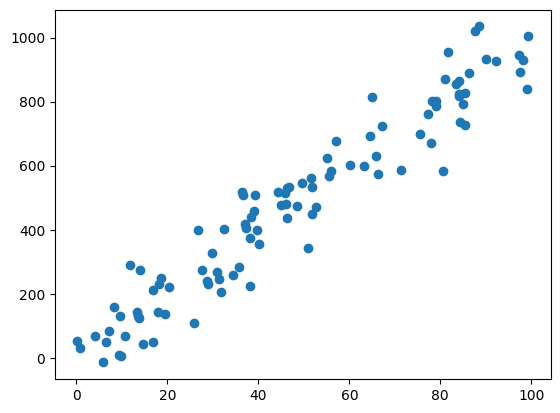

In [32]:
for _ in range(100):
    X = 100 * np.random.rand(100,1)
    Y = 4 + 10 * X + 75 * np.random.randn(100,1)

plt.plot(X, Y, 'o')


# Run Gradient Descent Algo

Iteration 1: Cost 255256.42707002672, Weight         [6.57476779], Bias [0.09656056]
Iteration 2: Cost 41441.04790781734, Weight         [8.66897169], Bias [0.12944838]
Iteration 3: Cost 11267.54587693296, Weight         [9.45567174], Bias [0.14217355]
Iteration 4: Cost 7009.476208657066, Weight         [9.75119668], Bias [0.14732443]
Iteration 5: Cost 6408.576925924036, Weight         [9.86220747], Bias [0.14962995]
Iteration 6: Cost 6323.775350869535, Weight         [9.90390391], Bias [0.15086656]
Iteration 7: Cost 6311.805177355555, Weight         [9.91956183], Bias [0.15170161]
Iteration 8: Cost 6310.112928176034, Weight         [9.92543814], Bias [0.15238578]
Iteration 9: Cost 6309.871093871322, Weight         [9.92763992], Bias [0.15301327]
Iteration 10: Cost 6309.833941562243, Weight         [9.92846132], Bias [0.15361943]
Iteration 11: Cost 6309.825674166562, Weight         [9.92876418], Bias [0.15421757]
Iteration 12: Cost 6309.821483304658, Weight         [9.92887224], Bias [

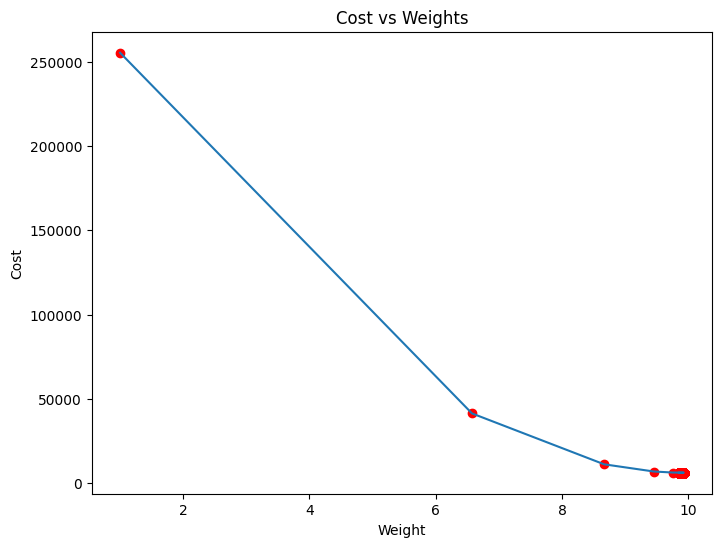

Estimated Weight: [9.85753233]
Estimated Bias: [4.78563185]


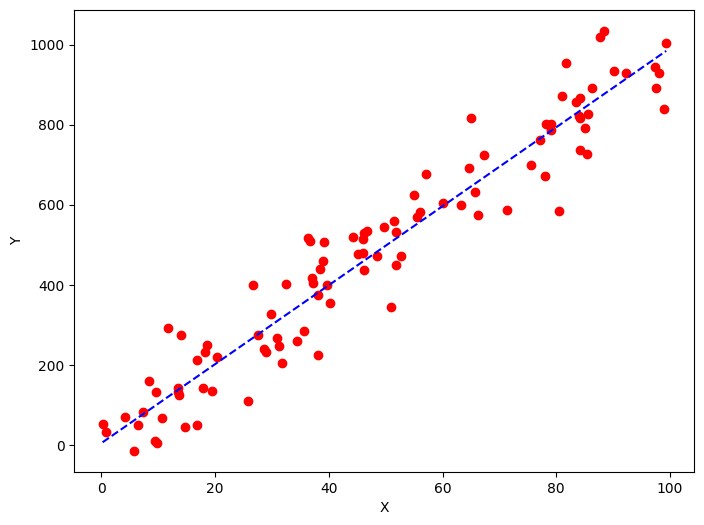

In [40]:
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost


def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost) <= stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias


estimated_weight, eatimated_bias = gradient_descent(X, Y, iterations=10000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")

# Making predictions using estimated parameters
Y_pred = estimated_weight*X + eatimated_bias

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
            markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
